# Python primer for HTMD

![](http://pub.htmd.org/tutorials/htmd_python_powered.png)

## Why Python?

* Modern, complete and open-source programming language
* Wide spread throughout the scientific community
* Easy to understand, rapid delivery and maintenance
* C++ still wins on low latency and control of memory
    * However, Python is versatile and has packages that can be as fast as C (e.g. NumPy)

## HTMD relation to Python and Miniconda

* HTMD is written in Python, using the **Python 3** synthax
* HTMD is, and works as, a Python module.
* HTMD is distributed through a package/module distribution platform called **Miniconda** (light-weight Anaconda)
* _Advantages of Miniconda_:
    1. Already distributes Python (`python`) and interactive Python (`ipython`) interpreters
    1. Everything is self-contained inside Miniconda and one does not have to rely on the operative system

## Programming basics with Python

* Python can do pretty much what any other programming language can. Arithmetics, variable definition, printing, etc.

In [1]:
a = 3 + 2
print('a is', a)

a is 5


## Python Interpreters and writing Python code

* `python` is the general interpreter
    * One can write a `script.py` file in Python and run `python script.py`
* There are powerful ways of writing and prototyping code in Python:
    * Interactive interpreters (`ipython`, `jupyter`)
    * IDE's (Spyder, Pycharm)

## Jupyter Notebooks

* This presentation is actually a Jupyter notebook (you can play with it, run the code yourself)
* A notebook like this one is a grapical interactive environment.
* It is made of cells:
    * **Text cells**, with formatted markdown text (like the bulleted text we have here)
    * **Code cells**, to run code interactively

### Extra: IPython built-in magic commands

* In IPython, some [magic commands](https://ipython.readthedocs.io/en/stable/interactive/magics.html) are available/built-in.
* Useful to navigate the filesystem (% indicates a magic command)
```python
%ls
%mkdir test
```
* Or for module reload for rewritting code for testing without need to reload the module all the time
```python
%load_ext autoreload
%autoreload 2
```

## Python modules usage

* A Python module is a file containing Python definitions and statements.
* In Python, modules have to be imported in order to be used.
* Here we show two ways of importing modules and one way of importing a functionality:

In [2]:
import os
import numpy as np
from glob import glob

In the first two, using the module funcionalities require the namespace: the original one `os`, or the defined one `np` (instead of `numpy`). In the last one, `glob` can be used instead of `glob.glob`

## `os` module and `glob` function: interacting with the filesystem

* The [`os` module](https://docs.python.org/3/library/os.html) serves to interact with the operative system
* Normal filesystem commands or magic commands work from the interactive session, but, in a program, the `os` functions should be used instead

In [3]:
os.chdir('.') # change directory
os.listdir('.') # list contents of directory
glob('python-*') # returns pathnames matching a regex pattern

['python-primer.ipynb']

## General Programming Overview

### Strings

Strings are identified by single or double apices:

In [ ]:
b='newtest' 
c="newtest"

### Relational operators

Relational operators are `==`,`<`,`>`,`<=`,`>=`, and `!=`, and they can be connected with `and`,`or`,`not`

In [ ]:
b == c

### Lists of objects (integers, strings...)

Lists of different objects are created using  square brackets

In [5]:
d = [1, 2, 3, 'ba', 5, 6, 7, 8, 9]
print(d[3])

ba


**Note:** in Python, indexes are zero-based.

### Conditionals (_if-clause_)

In [6]:
if 1 > 0:
    d = 100
print(d)

100


As you probably know, in Python, **indentation** is important. Use indentation to define a scope of code after the `:`. `print(d)` is no longer inside the scope of the _if-clause_ because it is not indented.

### Loops (_for-loop_)

In [7]:
for i in [1,2,3,4,5]:
    print(i)

1
2
3
4
5


Another way of doing the same, using Numpy:

In [8]:
for i in np.arange(1,6):
    print(i)

1
2
3
4
5


## Numpy: the best way to handle arrays

Arrays are best created and handled using `numpy` arrays (no need to import the module, we already did before)

In [9]:
m = np.array([[ 11., 12, 13, 14 ],
              [ 21, 22, 23, 24 ],
              [ 31, 32, 33, 34 ],
              [ 41, 42, 43, 44 ]
             ]
            )
print(m)

[[ 11.  12.  13.  14.]
 [ 21.  22.  23.  24.]
 [ 31.  32.  33.  34.]
 [ 41.  42.  43.  44.]]


where `m` is 4-by-4 matrix of double numbers (and not integers), due to the fact than `11.` is a real number (notice the dot).

### Array multiplication

Arrays can be multiplied easily element by element

In [10]:
n = 3.0 * m
print(n)

[[  33.   36.   39.   42.]
 [  63.   66.   69.   72.]
 [  93.   96.   99.  102.]
 [ 123.  126.  129.  132.]]


A scalar multiplication is applied to each element of the array.

### Sequences

An array sequence can be created with `arange` (like seen before). Array indexing starts at 0.

In [11]:
o = np.arange(0,4)
print(o)

[0 1 2 3]


### Slicing

In [12]:
o[1:] #from 1 until the end, (starts at zero)

array([1, 2, 3])

**Note**: See how we got the outcome without printing? It's because we're in interactive Python

In [13]:
m[:,0] = 99 # first column
m[-2:,]     # backwards indexing is possible, getting the last 2 rows

array([[ 99.,  32.,  33.,  34.],
       [ 99.,  42.,  43.,  44.]])

### More matrix operations

In [14]:
np.multiply(m,o)

array([[   0.,   12.,   26.,   42.],
       [   0.,   22.,   46.,   72.],
       [   0.,   32.,   66.,  102.],
       [   0.,   42.,   86.,  132.]])

In [15]:
m.transpose()
np.inner(m,o)

array([  80.,  140.,  200.,  260.])

### Other numpy operations

In [16]:
np.concatenate((o,o))

array([0, 1, 2, 3, 0, 1, 2, 3])

In [17]:
m.sum(axis=0)

array([ 396.,  108.,  112.,  116.])

In [18]:
print(o.shape)
print(o.size)
print(o.ndim)

(4,)
4
1


## Functions

Subroutines are defined using `def`:

In [19]:
def test(a, b=1, c=3):
    return a*b*c

In [20]:
test(1, c=5)

5

## Variables and Objects

* Python represents all its data as objects. 
* Variables are just names. 
* Some objects are mutable, some immutable.
    * Immutables are: int, float, complex, str, tuples, bytes, frozensets 
    * Mutables are: list, byte array, sets, dict, classes

## Identity of an object

With ```id``` it is possible to check the unique identity of an object

In [21]:
n = 1 # immutable integer
id(n)

139851826534944

In [22]:
n += 1
id(n) # new object

139851826534976

In [23]:
m = [1] # mutable list
id(m)

139851258335816

In [24]:
m.append(2)
id(m) # same object

139851258335816

## Argument passing

* Passing an argument to a function is like creating a new name to the object
* _If it is mutable_, then any change inside the function will affect the object outside. 
* _If it is immutable and the function changes it_, then python creates another object inside the function scope, so nothing changes outside of the function.

## Plots using `matplotlib` module

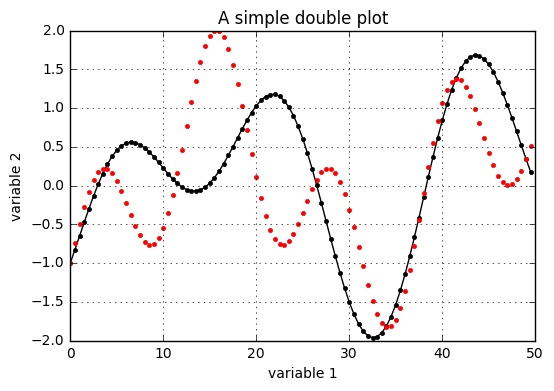

In [25]:
from matplotlib.pyplot import plot,title,xlabel,ylabel,grid,show,savefig
#Optional: magic line to make plots inline
%matplotlib inline

x = np.arange(0,50,.5)
y = np.sin(x/3) - np.cos(x/5)
plot(x,y, '.-k')
plot(x,np.sin(x/2) - np.cos(x/5),'.r')
title('A simple double plot')
xlabel('variable 1'), ylabel('variable 2'), grid(True)
show()

The plot is shown inline, but can also be saved:

In [26]:
savefig('/tmp/foo.eps')

## Getting Help

The `help` function provides help for any function:

In [27]:
help(print)

Help on built-in function print in module builtins:

print(...)
    print(value, ..., sep=' ', end='\n', file=sys.stdout, flush=False)
    
    Prints the values to a stream, or to sys.stdout by default.
    Optional keyword arguments:
    file:  a file-like object (stream); defaults to the current sys.stdout.
    sep:   string inserted between values, default a space.
    end:   string appended after the last value, default a newline.
    flush: whether to forcibly flush the stream.



## Debugging code in notebooks

Really nice to debug an error and see what's wrong by inspecting variables using `%debug` (Press PgDown for example)

In [28]:
def broken_function(b):
    print(b,xxx())
c = 4
broken_function(c)

NameError: name 'xxx' is not defined

In [29]:
%debug

> <ipython-input-28-e92f54b12af9>(2)broken_function()
      1 def broken_function(b):
----> 2     print(b,xxx())
      3 c = 4
      4 broken_function(c)

ipdb> print b
*** SyntaxError: Missing parentheses in call to 'print'
ipdb> print(b)
4
ipdb> quit


## Python Exercises

1. Sum the first 50 numbers with a for loop
2. Do the same thing using `numpy` arrays
3. Write a function that set a value for its argument (that is an integer)
4. The same but for a `numpy` arrray